In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("./data/titanic_train.csv")
test = pd.read_csv("./data/titanic_test.csv")

## 결측치

In [3]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

## 숫자로 변경

In [4]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

## 데이터 나누기

In [5]:
X = train.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)
y = train["Survived"]

In [6]:
X, y

(     PassengerId  Pclass Sex   Age  SibSp  Parch     Fare Embarked
 0              1       3   0  22.0      1      0   7.2500        0
 1              2       1   1  38.0      1      0  71.2833        1
 2              3       3   1  26.0      0      0   7.9250        0
 3              4       1   1  35.0      1      0  53.1000        0
 4              5       3   0  35.0      0      0   8.0500        0
 ..           ...     ...  ..   ...    ...    ...      ...      ...
 886          887       2   0  27.0      0      0  13.0000        0
 887          888       1   1  19.0      0      0  30.0000        0
 888          889       3   1  28.0      1      2  23.4500        0
 889          890       1   0  26.0      0      0  30.0000        1
 890          891       3   0  32.0      0      0   7.7500        2
 
 [891 rows x 8 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train = X_train.astype("float")
X_test = X_test.astype("float")
y_train = y_train.astype("float")
y_test = y_test.astype("float")

In [9]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [10]:
params = {"objective": ["binary:logistic"],
          "booster": ["gbtree"],
          "eta": [0.01],
          "max_depth": [0,1,2,3,4,5,6,7,8,9,10],
          "min_child_weight": [0,1,2,3,4,5,6,7,8,9,10],
          "colsample_bytree": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
          "subsample": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
          "alpha": [0,1,2,3,4,5],
          "lambda": [0,1,2,3,4,5],
          "n_estimators": [50000],
          "random_state": [42]
}

In [11]:
clf = xgb.XGBClassifier()
clf_grid = RandomizedSearchCV(clf, 
                              params, 
                              cv=5, 
                              n_iter=50, 
                              random_state=42, 
                              scoring="accuracy")

In [12]:
clf_grid.fit(X_train, y_train, 
             early_stopping_rounds=50,
             eval_set = [(X_test, y_test)],
             eval_metric = "error",
             verbose = 0)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'booster': ['gbtree'],
                                        'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'eta': [0.01],
                                        'lambda': [0, 1, 2, 3, 4, 5],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10],
                                        'min_child_weight': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9, 10],
                                        'n_estimators': [50000],
                                        'objective': ['binary:logistic'],
                                        'random_state': [42],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, scoring='accuracy')

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(clf_grid.best_params_)
print(clf_grid.best_score_)

{'subsample': 0.6, 'random_state': 42, 'objective': 'binary:logistic', 'n_estimators': 50000, 'min_child_weight': 0, 'max_depth': 8, 'lambda': 1, 'eta': 0.01, 'colsample_bytree': 1.0, 'booster': 'gbtree', 'alpha': 0}
0.8128605094826618


In [14]:
bst = clf_grid.best_estimator_
print(bst)

XGBClassifier(alpha=0, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=1,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=0, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=50000, ...)


In [15]:
pred_1 = bst.predict(X_test)
grid_score = accuracy_score(y_test, pred_1)
print(grid_score)

0.8340807174887892


In [16]:
confusion_matrix(y_test, pred_1)

array([[125,   9],
       [ 28,  61]], dtype=int64)

In [21]:
import matplotlib.pyplot as plt
def plot_f_importances(model):
    n_f = X.shape[1]
    plt.barh(range(n_f), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_f),X)
    plt.show()


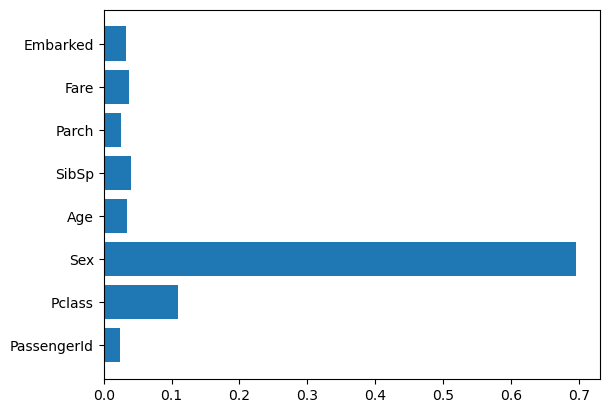

In [22]:
plot_f_importances(bst)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [25]:
X = test.drop(["Name", "Ticket", "Cabin"], axis=1)
X = X.astype("float")
Y = bst.predict(X)
Y = np.array(Y, dtype = "int64")
print(Y)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]


In [26]:
PassengerId = np.array(test["PassengerId"]).astype(int)
result = pd.DataFrame(Y,PassengerId,columns=["Survived"])

In [27]:
result.to_csv("submission.csv", index_label=["PassengerId"])